# Decision Tree Exercise

**Description of the problem**

This dataset originally comes from the National Institute of Diabetes and Digestive and Kidney Diseases. The goal is to predict, based on diagnostic measures, whether or not a patient has diabetes.

https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv


## Variables

**Pregnancies** Number of pregnancies of the patient (numeric)\
**Glucose** Plasma glucose concentration 2 hours after an oral glucose tolerance test (numeric)\
**BloodPressure** Diastolic blood pressure (measured in mm Hg) (numeric)\
**SkinThickness** Triceps skin fold thickness (measured in mm) (numeric)\
**Insulin** 2-hour serum insulin (measured in mu U/ml) (numeric)\
**BMI** Body mass index (numeric)\
**DiabetesPedigreeFunction** Diabetes Pedigree Function (numeric)\
**Age** Age of patient (numeric)\
**Outcome** Class variable (0 or 1), being 0 negative in diabetes and 1 positive (numeric)

# Table of Contents

<a id='table_of_contents'></a>

0. [Import Libraries](#0)
1. [Import Data](#1)
2. [Data Exploration](#2)
3. [Univariate Analysis](#3)
4. [Data Preparation](#4)
5. [Feature Engineering](#5)
6. [Feature Selection](#6)
7. [Linear Regression Model](#7)

# 0. Import Libraries <a id='0'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

[Back to top](#table_of_contents)

# 1. Import Data <a id='1'></a>

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
display(data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data.to_csv("../data/raw/data.csv", index=False)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


[Back to top](#table_of_contents)

# 2. Data Exploration <a id='2'></a>

In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 3. Univariate Analysis <a id='3'></a>

## 3.1. Numeric Variables

### Pregnancies

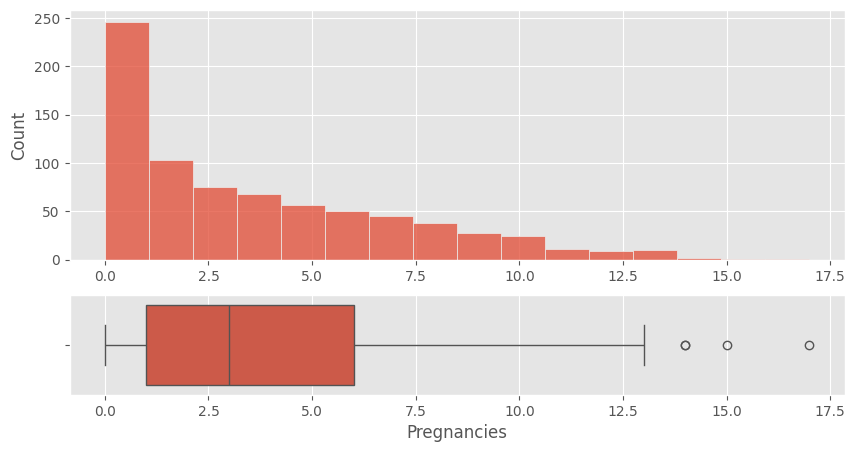

In [9]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={"height_ratios": [5, 2]})

sns.histplot(data=data, x="Pregnancies", ax=axes[0]).set(xlabel=None)
sns.boxplot(data=data, x="Pregnancies", ax=axes[1])

plt.show()

### Glucose

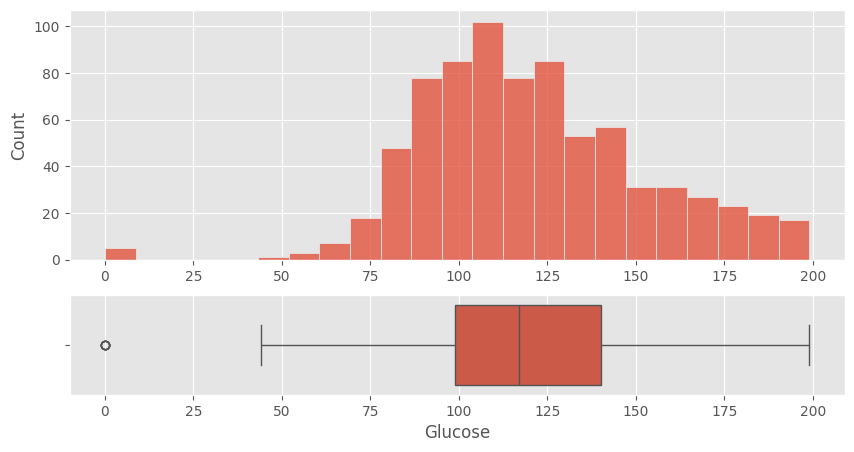

In [12]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={"height_ratios": [5, 2]})

sns.histplot(data=data, x="Glucose", ax=axes[0]).set(xlabel=None)
sns.boxplot(data=data, x="Glucose", ax=axes[1])

plt.show()

### BloodPressure

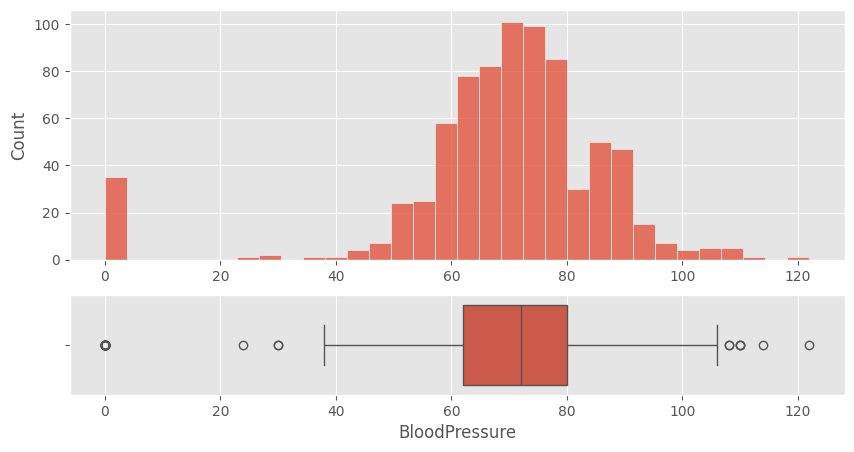

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={"height_ratios": [5, 2]})

sns.histplot(data=data, x="BloodPressure", ax=axes[0]).set(xlabel=None)
sns.boxplot(data=data, x="BloodPressure", ax=axes[1])

plt.show()

### SkinThickness

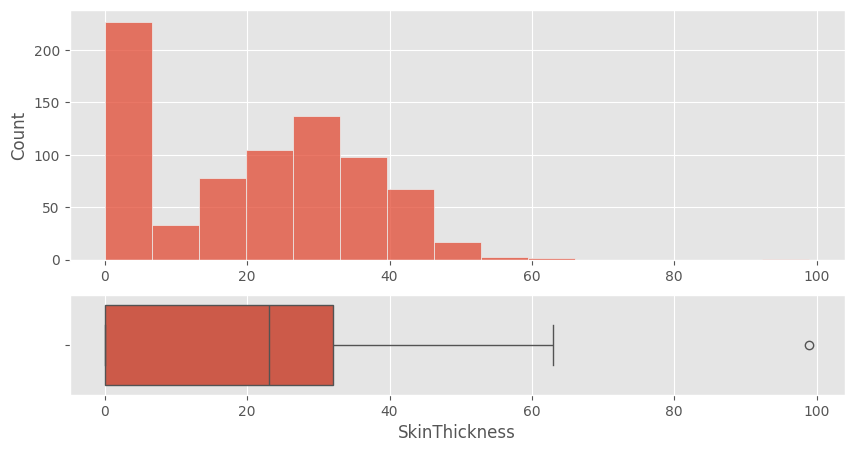

In [15]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={"height_ratios": [5, 2]})

sns.histplot(data=data, x="SkinThickness", ax=axes[0]).set(xlabel=None)
sns.boxplot(data=data, x="SkinThickness", ax=axes[1])

plt.show()

### Insulin

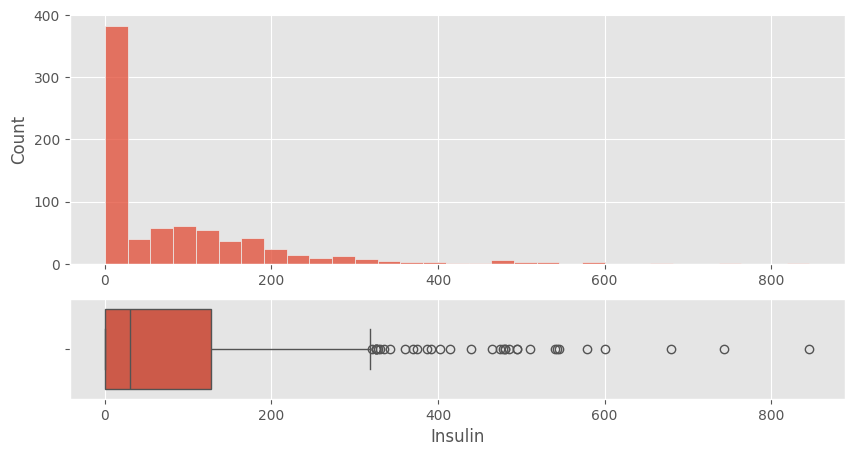

In [16]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={"height_ratios": [5, 2]})

sns.histplot(data=data, x="Insulin", ax=axes[0]).set(xlabel=None)
sns.boxplot(data=data, x="Insulin", ax=axes[1])

plt.show()

### BMI

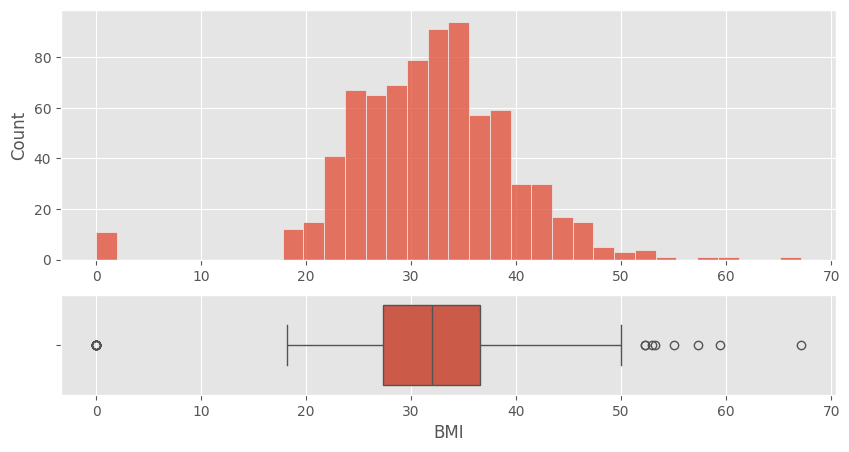

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={"height_ratios": [5, 2]})

sns.histplot(data=data, x="BMI", ax=axes[0]).set(xlabel=None)
sns.boxplot(data=data, x="BMI", ax=axes[1])

plt.show()

### DiabetesPedigreeFunction

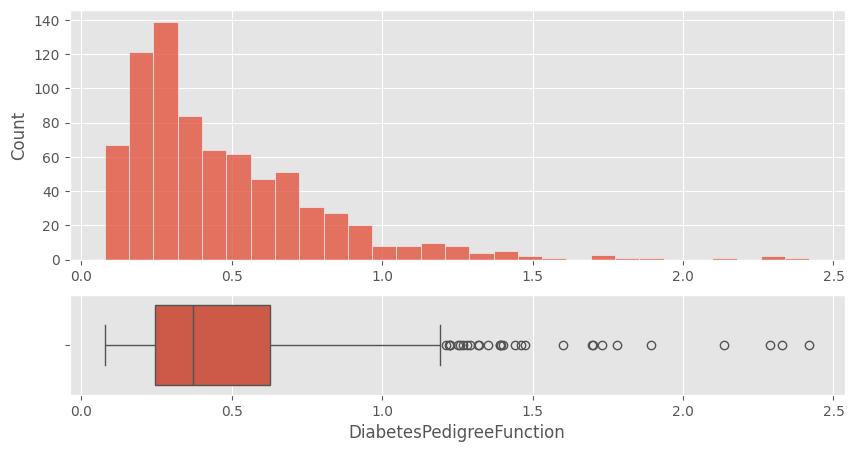

In [18]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={"height_ratios": [5, 2]})

sns.histplot(data=data, x="DiabetesPedigreeFunction", ax=axes[0]).set(xlabel=None)
sns.boxplot(data=data, x="DiabetesPedigreeFunction", ax=axes[1])

plt.show()

### Age

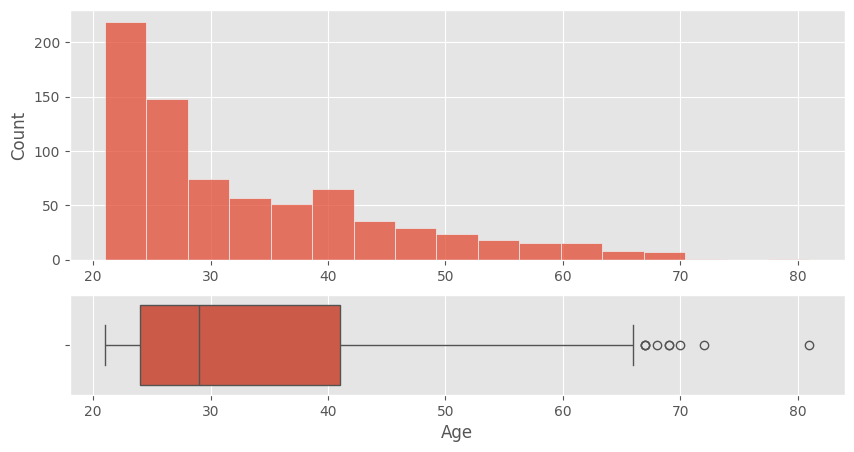

In [19]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={"height_ratios": [5, 2]})

sns.histplot(data=data, x="Age", ax=axes[0]).set(xlabel=None)
sns.boxplot(data=data, x="Age", ax=axes[1])

plt.show()

[Back to top](#table_of_contents)

# 4. Multivariate Analysis <a id='4'></a>

## 4.1. Numeric-numeric Analysis

In [21]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


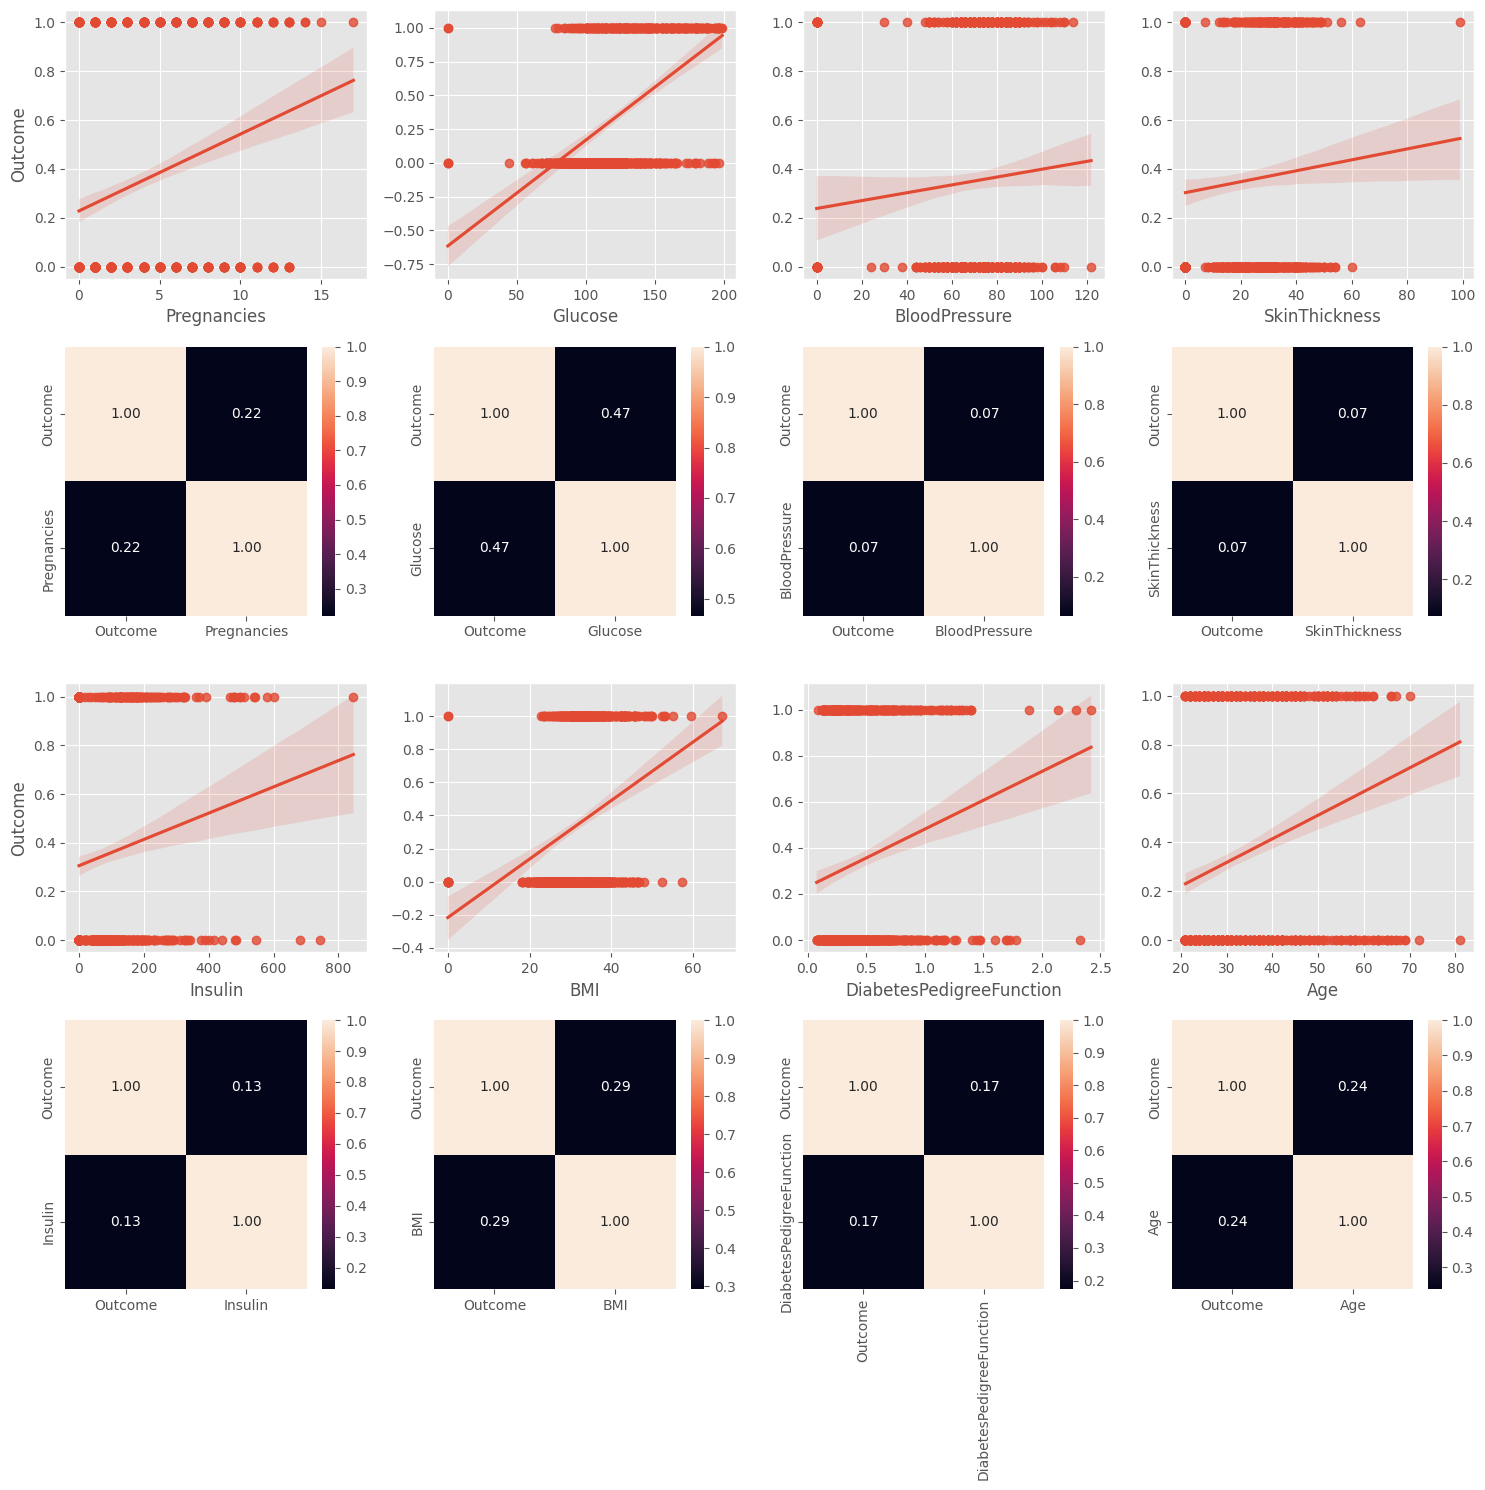

In [29]:
fig, axes = plt.subplots(4, 4, figsize=(15, 15))

sns.regplot(ax=axes[0, 0], data=data, x="Pregnancies", y="Outcome")
sns.heatmap(data[["Outcome", "Pregnancies"]].corr(), annot=True, fmt=".2f", ax=axes[1, 0])

sns.regplot(ax=axes[0, 1], data=data, x="Glucose", y="Outcome", robust=True).set(ylabel=None)
sns.heatmap(data[["Outcome", "Glucose"]].corr(), annot=True, fmt=".2f", ax=axes[1, 1])

sns.regplot(ax=axes[0, 2], data=data, x="BloodPressure", y="Outcome").set(ylabel=None)
sns.heatmap(data[["Outcome", "BloodPressure"]].corr(), annot=True, fmt=".2f", ax=axes[1, 2])

sns.regplot(ax=axes[0, 3], data=data, x="SkinThickness", y="Outcome").set(ylabel=None)
sns.heatmap(data[["Outcome", "SkinThickness"]].corr(), annot=True, fmt=".2f", ax=axes[1, 3])

sns.regplot(ax=axes[2, 0], data=data, x="Insulin", y="Outcome")
sns.heatmap(data[["Outcome", "Insulin"]].corr(), annot=True, fmt=".2f", ax=axes[3, 0])

sns.regplot(ax=axes[2, 1], data=data, x="BMI", y="Outcome").set(ylabel=None)
sns.heatmap(data[["Outcome", "BMI"]].corr(), annot=True, fmt=".2f", ax=axes[3, 1])

sns.regplot(ax=axes[2, 2], data=data, x="DiabetesPedigreeFunction", y="Outcome").set(ylabel=None)
sns.heatmap(data[["Outcome", "DiabetesPedigreeFunction"]].corr(), annot=True, fmt=".2f", ax=axes[3, 2])

sns.regplot(ax=axes[2, 3], data=data, x="Age", y="Outcome").set(ylabel=None)
sns.heatmap(data[["Outcome", "Age"]].corr(), annot=True, fmt=".2f", ax=axes[3, 3])

plt.tight_layout()

plt.show()

## 4.3. Correlation Analysis

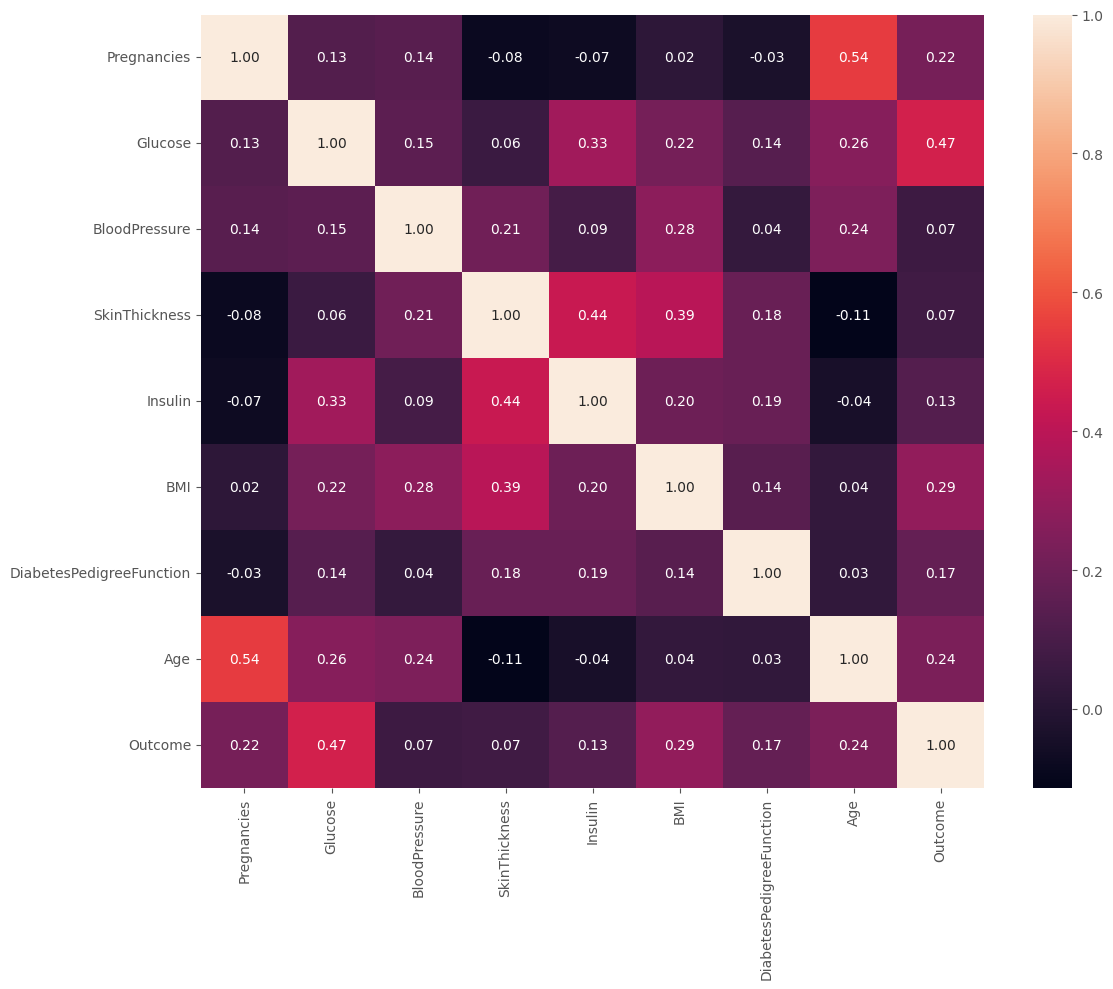

In [34]:
fig, axis = plt.subplots(figsize=(12, 10))

sns.heatmap(
    data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]].corr(),
    annot=True,
    fmt=".2f",
)

plt.tight_layout()
plt.show()

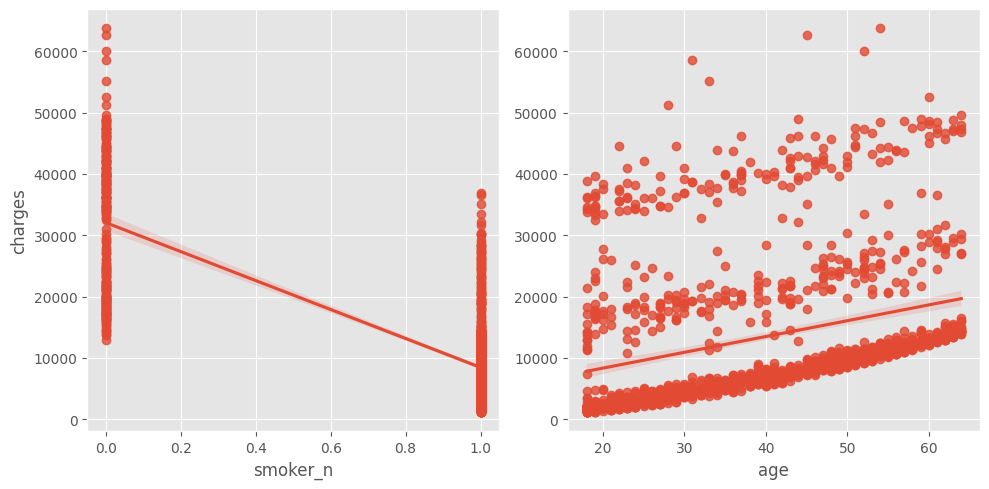

In [22]:
fig, axes = plt.subplots(figsize=(10, 5), ncols=2)

sns.regplot(ax=axes[0], data=data, x="smoker_n", y="charges")
sns.regplot(ax=axes[1], data=data, x="age", y="charges").set(ylabel=None)

plt.tight_layout()
plt.show()

[Back to top](#table_of_contents)

# 5. Feature Engineering <a id='5'></a>

In [23]:
data.describe()

,age,bmi,children,charges,sex_n,smoker_n,region_n
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.795217,1.484305
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,1.104885
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,1.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


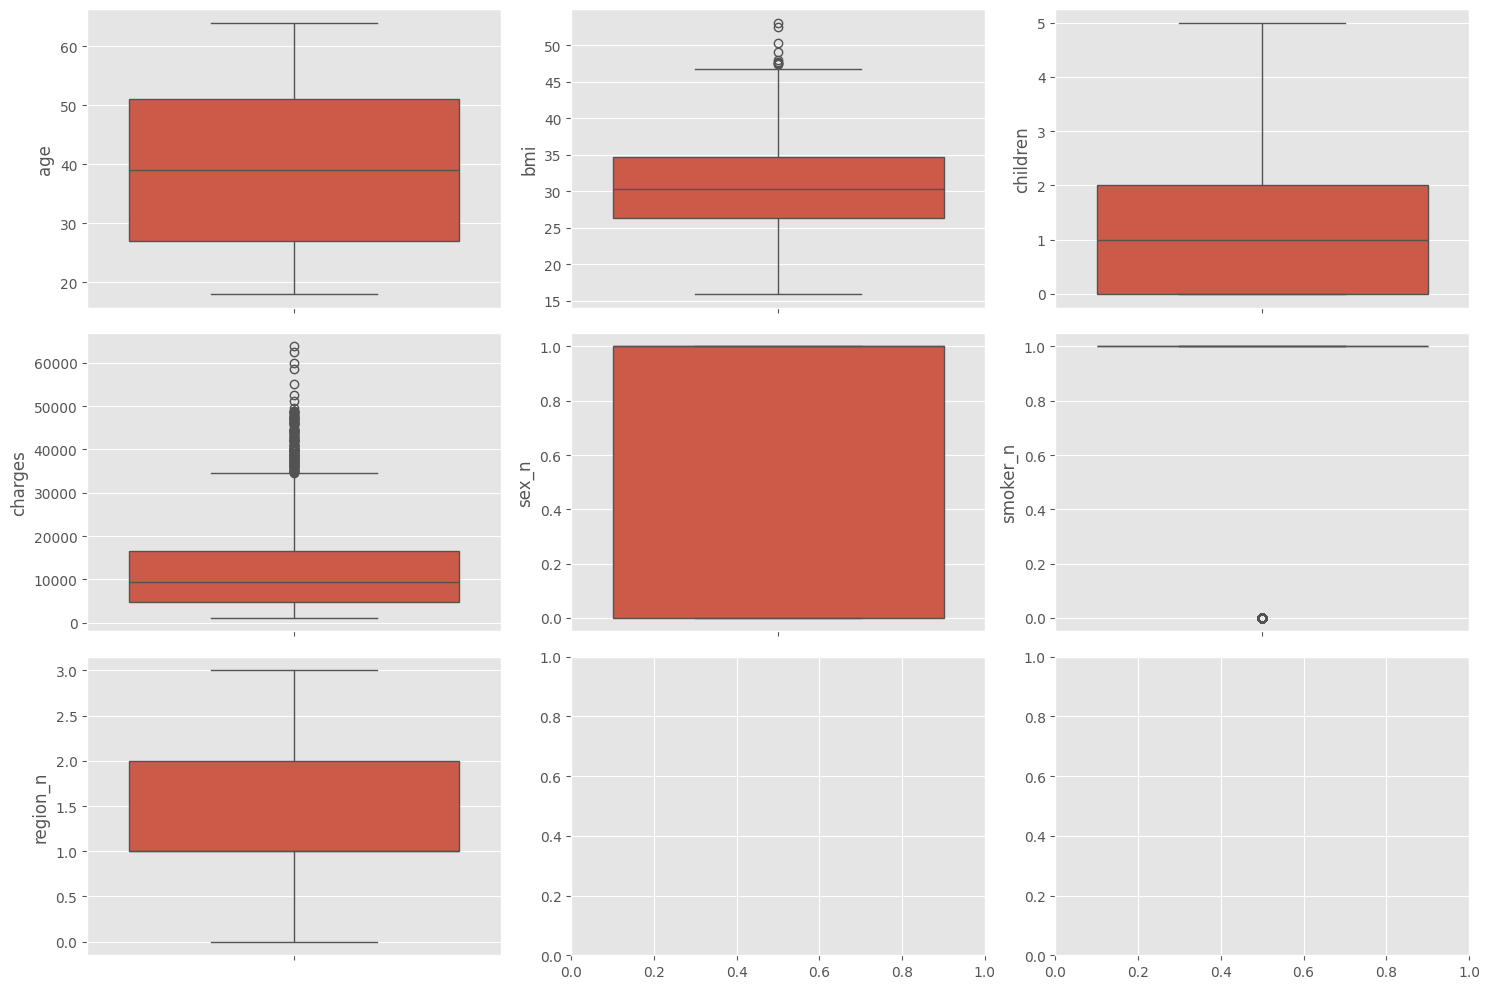

In [24]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

sns.boxplot(ax=axes[0, 0], data=data, y="age")
sns.boxplot(ax=axes[0, 1], data=data, y="bmi")
sns.boxplot(ax=axes[0, 2], data=data, y="children")
sns.boxplot(ax=axes[1, 0], data=data, y="charges")
sns.boxplot(ax=axes[1, 1], data=data, y="sex_n")
sns.boxplot(ax=axes[1, 2], data=data, y="smoker_n")
sns.boxplot(ax=axes[2, 0], data=data, y="region_n")

plt.tight_layout()
plt.show()

## 5.1. Outlier Analysis

In [25]:
# Limits analysis

def get_column_stat(column):
    stats = data[column].describe()
    iqr = stats["75%"] - stats["25%"]
    upper_limit = stats["75%"] + 1.5 * iqr
    lower_limit = stats["25%"] - 1.5 * iqr

    print(f"The stats for the '{column}' column are:\n")
    print(f"- Upper limit: {round(upper_limit,2)}")
    print(f"- Lower limit: {round(lower_limit,2)}")
    print(f"- Interquartile range: {round(iqr,2)}\n")
    print(f"{stats}\n")

### bmi

In [26]:
get_column_stat("bmi")

The stats for the 'bmi' column are:

- Upper limit: 47.29
- Lower limit: 13.7
- Interquartile range: 8.4

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64



In [27]:
data[data['bmi'] > 47]

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
116,58,male,49.06,0,no,southeast,11381.32540,1,1,1
286,46,female,48.07,2,no,northeast,9432.92530,0,1,3
401,47,male,47.52,1,no,southeast,8083.91980,1,1,1
543,54,female,47.41,0,yes,southeast,63770.42801,0,0,1
847,23,male,50.38,1,no,southeast,2438.05520,1,1,1
860,37,female,47.60,2,yes,southwest,46113.51100,0,0,0
1047,22,male,52.58,1,yes,southeast,44501.39820,1,0,1
1088,52,male,47.74,1,no,southeast,9748.91060,1,1,1
1317,18,male,53.13,0,no,southeast,1163.46270,1,1,1


There are 9 records with a BMI higher than the upper limit.\
Since the BMI can have a big difference from person to person, and the number is not that significant, the best approach is to leave the variable as it is.

### charges

In [28]:
get_column_stat("charges")

The stats for the 'charges' column are:

- Upper limit: 34489.35
- Lower limit: -13109.15
- Interquartile range: 11899.63

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64



In [29]:
data[data['charges'] > 34500]

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
14,27,male,42.130,0,yes,southeast,39611.75770,1,0,1
19,30,male,35.300,0,yes,southwest,36837.46700,1,0,0
23,34,female,31.920,1,yes,northeast,37701.87680,0,0,3
29,31,male,36.300,2,yes,southwest,38711.00000,1,0,0
30,22,male,35.600,0,yes,southwest,35585.57600,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309,1,0,1
1301,62,male,30.875,3,yes,northwest,46718.16325,1,0,2
1303,43,male,27.800,0,yes,southwest,37829.72420,1,0,0
1313,19,female,34.700,2,yes,southwest,36397.57600,0,0,0


In [30]:
data[(data["charges"] > 34500) & (data["smoker_n"] == 0)]

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
14,27,male,42.130,0,yes,southeast,39611.75770,1,0,1
19,30,male,35.300,0,yes,southwest,36837.46700,1,0,0
23,34,female,31.920,1,yes,northeast,37701.87680,0,0,3
29,31,male,36.300,2,yes,southwest,38711.00000,1,0,0
30,22,male,35.600,0,yes,southwest,35585.57600,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309,1,0,1
1301,62,male,30.875,3,yes,northwest,46718.16325,1,0,2
1303,43,male,27.800,0,yes,southwest,37829.72420,1,0,0
1313,19,female,34.700,2,yes,southwest,36397.57600,0,0,0


With a total of 139 rows above the upper limit, the 'charges' variable is by far the most discrepant variable of all.\
But with a further analysis we can see that most of those values (136) are from smokers which may explain why they are charged more.

## 5.2. Missing Values Analysis

In [31]:
data.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
sex_n       0
smoker_n    0
region_n    0
dtype: int64

## 5.3. Feature Scaling

In [107]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ["age", "bmi", "children", "sex_n", "smoker_n", "region_n", "charges"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(data[num_variables])
total_data_scal = pd.DataFrame(scal_features, index=data.index, columns=num_variables)
total_data_scal.head()

,age,bmi,children,sex_n,smoker_n,region_n,charges
0,0.021739,0.321227,0.0,0.0,0.0,0.000000,0.251611
1,0.000000,0.479150,0.2,1.0,1.0,0.333333,0.009636
2,0.217391,0.458434,0.6,1.0,1.0,0.333333,0.053115
3,0.326087,0.181464,0.0,1.0,1.0,0.666667,0.333010
4,0.304348,0.347592,0.0,1.0,1.0,0.666667,0.043816


In [164]:
from sklearn.model_selection import train_test_split

X = total_data_scal.drop("charges", axis=1)
y = total_data_scal["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,age,bmi,children,sex_n,smoker_n,region_n
560,0.608696,0.107345,0.4,0.0,1.0,0.666667
1285,0.630435,0.224913,0.0,0.0,1.0,1.000000
1142,0.739130,0.239440,0.0,0.0,1.0,0.333333
969,0.456522,0.493947,1.0,0.0,1.0,0.333333
486,0.782609,0.148238,0.6,0.0,1.0,0.666667


[Back to top](#table_of_contents)

# 6. Feature Selection <a id='6'></a>

In [166]:
from sklearn.feature_selection import f_regression, SelectKBest

selection_model = SelectKBest(f_regression, k=5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[ix])

X_train_sel.head()

,age,bmi,children,sex_n,smoker_n
0,0.608696,0.107345,0.4,0.0,1.0
1,0.630435,0.224913,0.0,0.0,1.0
2,0.739130,0.239440,0.0,0.0,1.0
3,0.456522,0.493947,1.0,0.0,1.0
4,0.782609,0.148238,0.6,0.0,1.0


In [167]:
X_test_sel.head()

,age,bmi,children,sex_n,smoker_n
0,0.586957,0.247915,0.4,0.0,1.0
1,0.391304,0.378262,0.0,0.0,1.0
2,1.000000,0.293920,0.0,0.0,0.0
3,0.608696,0.263250,0.6,1.0,1.0
4,0.021739,0.429379,0.0,1.0,0.0


In [174]:
X_train_sel["charges"] = list(y_train)
X_test_sel["charges"] = list(y_test)

X_train_sel.to_csv("../data/processed/clean_train.csv", index=False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index=False)

[Back to top](#table_of_contents)

# 7. Linear Regression Model <a id='7'></a>

In [184]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,age,bmi,children,sex_n,smoker_n,charges
0,0.608696,0.107345,0.4,0.0,1.0,0.128845
1,0.630435,0.224913,0.0,0.0,1.0,0.118324
2,0.739130,0.239440,0.0,0.0,1.0,0.414952
3,0.456522,0.493947,1.0,0.0,1.0,0.119316
4,0.782609,0.148238,0.6,0.0,1.0,0.181225


In [185]:
from sklearn.linear_model import LinearRegression

X_train = train_data.drop(["charges"], axis=1)
y_train = train_data["charges"]

X_test = test_data.drop(["charges"], axis=1)
y_test = test_data["charges"]

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [186]:
print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b): {model.coef_}")

Intercept (a): 0.32360290909938694
Coefficients (b): [ 1.88754113e-01  1.94328838e-01  3.40993050e-02 -1.26926926e-04
 -3.77565032e-01]


In [187]:
y_pred = model.predict(X_test)
y_pred

array([ 1.18645088e-01,  9.34054050e-02,  5.69474121e-01,  1.32421395e-01,
        4.11019963e-01,  1.59229691e-01, -1.55885132e-02,  2.49395931e-01,
       -5.97523380e-03,  1.60128229e-01,  4.37301014e-01,  1.30414974e-01,
        6.92537268e-02,  5.96799188e-01,  6.26310312e-01,  5.76254823e-01,
        2.26576549e-01,  5.57484956e-01,  1.30959393e-01,  4.83303765e-01,
        5.02448985e-02,  1.49130175e-01,  2.55082049e-02,  8.71155544e-02,
        1.61378483e-01,  1.81172482e-01,  2.18444609e-01,  7.89215171e-02,
        1.34301845e-01,  2.00455461e-02,  1.33334011e-01,  1.89012499e-01,
        5.72114828e-02,  3.65978216e-02,  5.89602740e-02,  1.81365684e-01,
        1.97492546e-02,  1.28321345e-01,  5.12650336e-01,  5.04744979e-01,
        5.03238393e-02,  4.96048210e-02,  2.12510746e-01,  1.63815354e-01,
        1.24565218e-01,  1.81300559e-01,  6.43683487e-02,  3.88233473e-02,
        5.51133797e-01,  1.30160727e-01,  2.37028392e-01,  2.28397626e-02,
        1.76239118e-01, -

In [188]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 0.008657485532760651
Coefficient of determination: 0.7811302113434095
